In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [3]:
os.listdir(path)

['olist_customers_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_products_dataset.csv',
 'olist_geolocation_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_payments_dataset.csv']

In [4]:
# Carregando os dataset
df_1= pd.read_csv(path + '/olist_orders_dataset.csv')
df_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
df_2= pd.read_csv(path + '/olist_order_items_dataset.csv')
df_2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
df_3= pd.read_csv(path + '/olist_products_dataset.csv')
df_3.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# Realizando o merge dos dataframes
df_12= df_1.merge(df_2, on='order_id', how= 'left')
df= df_12.merge(df_3, on='product_id', how= 'left')


df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [8]:
df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,...,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
113424,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,68.50,18.36,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [10]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,161
order_delivered_carrier_date,1968
order_delivered_customer_date,3229
order_estimated_delivery_date,0
order_item_id,775
product_id,775


In [13]:
'''Os valores ausentes nas colunas order_approved_at, order_delivered_carrier_date e order_delivered_customer_date não foram removidos nem preenchidos,
 pois representam estados reais do pedido (não aprovado, não enviado ou não entregue). Preenchê-los distorceria a análise.'''

df = df[df['order_item_id'].notna()]
#As linhas sem itens vinculados foram removidas, pois não possuem informações essenciais (produto, preço, frete). Esses registros geralmente representam pedidos cancelados ou incompletos


df['product_category_name'] = df['product_category_name'].fillna('unknown')


cols = ['product_name_lenght','product_description_lenght','product_photos_qty']


df[cols] = df[cols].fillna(0)
#Os atributos textuais e de quantidade foram substituídos por 0, pois representam ausência de informação. Isso evita distorção estatística sem criar valores artificiais


df = df.dropna(subset=['product_weight_g','product_length_cm','product_height_cm','product_width_cm'])
#Medidas físicas são essenciais para análise de frete e logística. Valores ausentes tornam o produto inválido para análise, e por isso foram removidos


df.isnull().sum()


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [14]:


# seleciona colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# dicionário para armazenar resultados
outlier_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = len(outliers)

# Exibe quantidade de outliers por coluna
pd.DataFrame.from_dict(outlier_info, orient='index', columns=['Outliers'])


,Outliers
order_item_id,13982
price,8426
freight_value,12134
product_name_lenght,2358
product_description_lenght,7025
product_photos_qty,3073
product_weight_g,15807
product_length_cm,3617
product_height_cm,7670
product_width_cm,2563


In [15]:
'''As colunas price, freight_value, product_weight_g e order_item_id tiveram seus outliers mantidos porque representam situações reais do e-commerce,
como produtos muito caros, fretes elevados, itens muito pesados ou pedidos com muitos produtos.
Remover esses valores poderia distorcer a distribuição natural dos dados.'''



# Lista das colunas a tratar
cols_to_treat = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ajuste dos outliers através do método de capping
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

for col in cols_to_treat:
    treat_outliers_iqr(df, col)


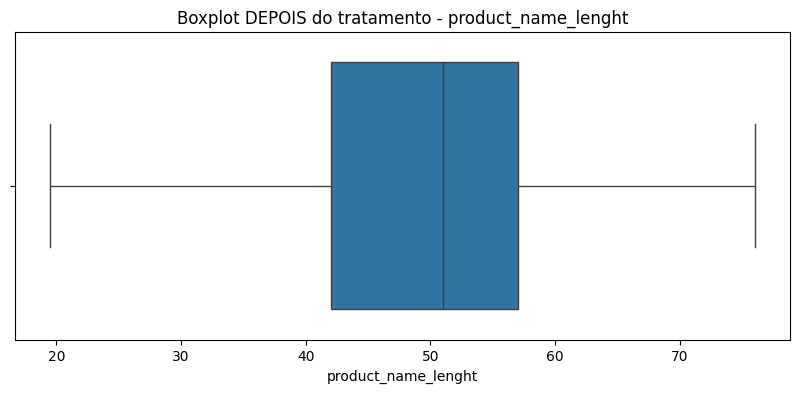

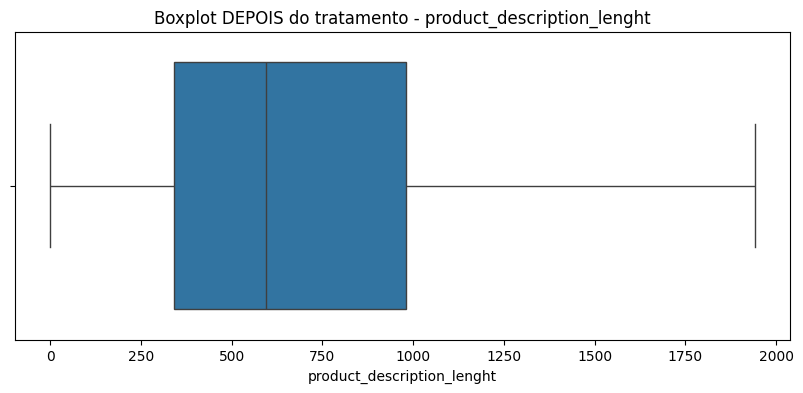

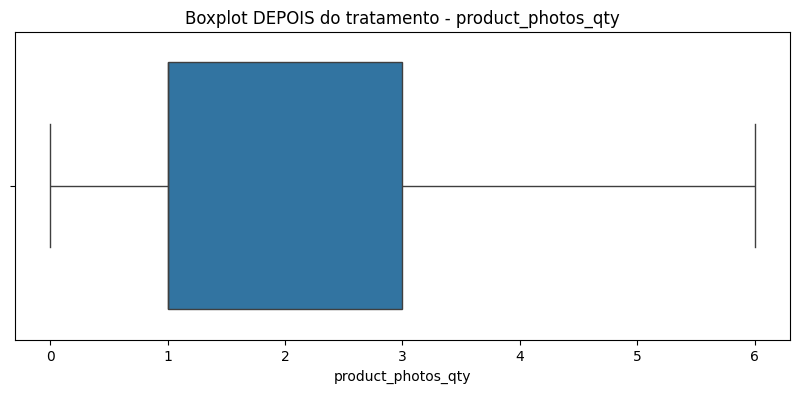

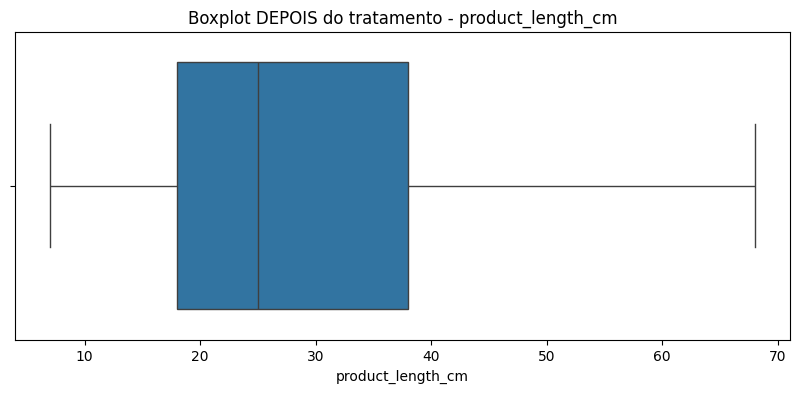

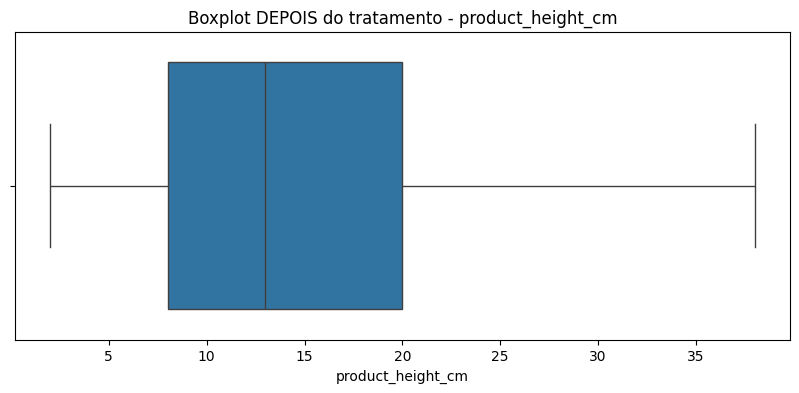

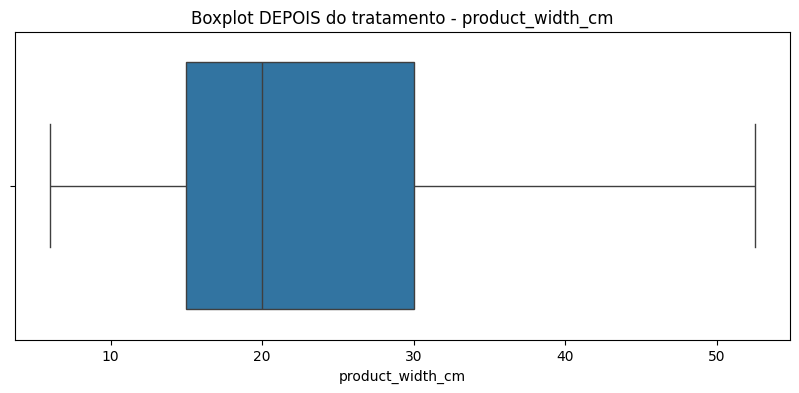

In [16]:
for col in cols_to_treat:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot DEPOIS do tratamento - {col}")
    plt.show()


In [17]:
#Contagem dos outliers após tratamento
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)


outliers_after = {}

#Exibição do número de outliers por colunas
for col in cols_to_treat:
    outliers_after[col] = count_outliers_iqr(df, col)

pd.DataFrame.from_dict(outliers_after, orient='index', columns=['Outliers'])


,Outliers
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [18]:
#Conversão e padronização de tipos

#Conversão de tipos
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'], errors='coerce')

# numéricas garantidas
num_cols = ['price','freight_value','product_weight_g','product_length_cm',
            'product_height_cm','product_width_cm',
            'product_name_lenght','product_description_lenght','product_photos_qty']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# categorizar colunas de texto para reduzir memória e indicar nominalidade
cat_cols = ['order_status','product_category_name','seller_id']
for c in cat_cols:
    df[c] = df[c].astype('category')


In [19]:
# Limpeza básica de texto
text_cols = ['product_category_name']
for c in text_cols:
    df[c] = df[c].astype(str).str.strip().str.lower().replace({'nan':'unknown'})

df['order_status'] = df['order_status'].str.lower()

for col in ['customer_id', 'seller_id', 'product_id', 'order_id']:
    df[col] = df[col].astype(str)



In [20]:
# Codificação de dados categóricos
top_cats = df['product_category_name'].value_counts().nlargest(15).index.tolist()
df['product_category_top'] = df['product_category_name'].where(df['product_category_name'].isin(top_cats),'other')
df = pd.get_dummies(df, columns=['product_category_top'], prefix='cat', drop_first=True)

In [21]:
#Normalização e padronização

scale_cols = ['price','freight_value','product_weight_g','product_length_cm',
              'product_height_cm','product_width_cm']

# copiar subset sem NaNs
scaler_mm = MinMaxScaler()
scaler_std = StandardScaler()

df[[c+'_minmax' for c in scale_cols]] = scaler_mm.fit_transform(df[scale_cols].fillna(0))
df[[c+'_z' for c in scale_cols]] = scaler_std.fit_transform(df[scale_cols].fillna(df[scale_cols].median()))


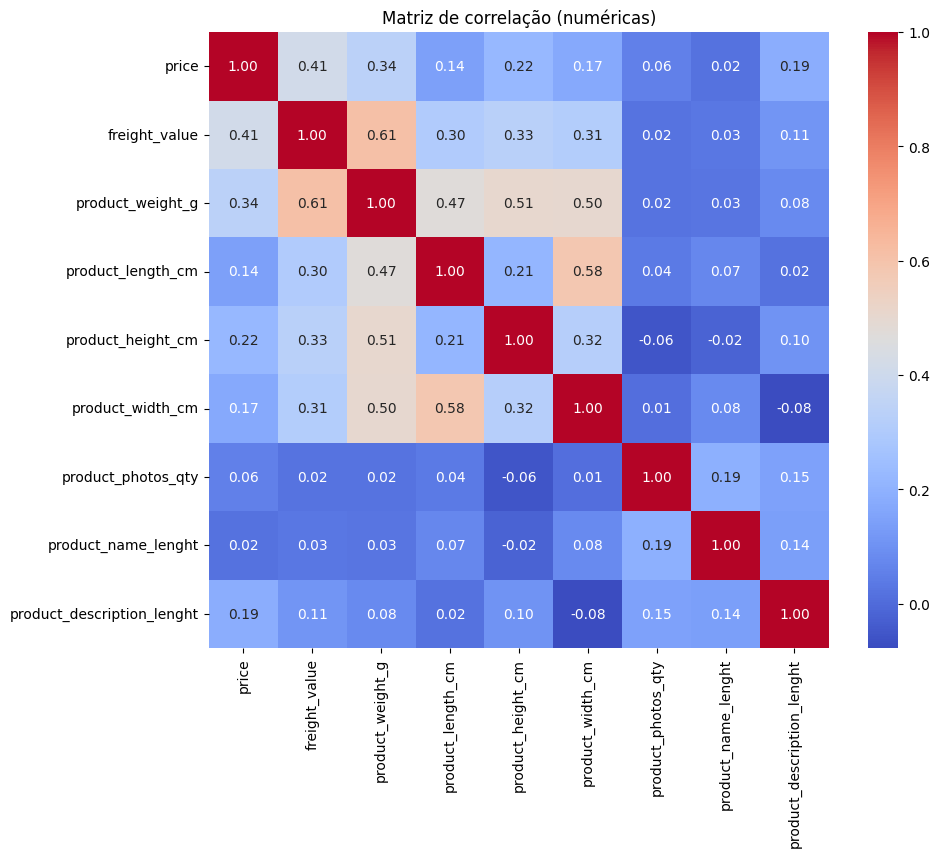

In [22]:
#Seleção de atributos

#correlação (numéricas)
corr = df[scale_cols + ['product_photos_qty','product_name_lenght','product_description_lenght']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlação (numéricas)')
plt.show()


In [23]:
#Seleção de atributos
#baixa variância

vt = VarianceThreshold(threshold=0.0001)  # ajustável
# aplicar somente em variáveis numéricas prontas (ex: scalers criados)
num_for_vt = df[[c+'_minmax' for c in scale_cols]].fillna(0)
vt.fit(num_for_vt)
sel_cols = num_for_vt.columns[vt.get_support()].tolist()
sel_cols



['price_minmax',
 'freight_value_minmax',
 'product_weight_g_minmax',
 'product_length_cm_minmax',
 'product_height_cm_minmax',
 'product_width_cm_minmax']

In [24]:
#Seleção de atributos
#filtros simples

high_card = [c for c in df.columns if df[c].nunique(dropna=False)/len(df) < 0.01]
high_card  # colunas de baixa variância categórica


['order_status',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_category_name',
 'product_name_lenght',
 'product_photos_qty',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'cat_bebes',
 'cat_beleza_saude',
 'cat_brinquedos',
 'cat_cama_mesa_banho',
 'cat_cool_stuff',
 'cat_eletronicos',
 'cat_esporte_lazer',
 'cat_ferramentas_jardim',
 'cat_informatica_acessorios',
 'cat_moveis_decoracao',
 'cat_other',
 'cat_perfumaria',
 'cat_relogios_presentes',
 'cat_telefonia',
 'cat_utilidades_domesticas',
 'product_length_cm_minmax',
 'product_height_cm_minmax',
 'product_width_cm_minmax',
 'product_length_cm_z',
 'product_height_cm_z',
 'product_width_cm_z']

In [25]:
# Feature engineering
# tempo entre compra e aprovação (minutos/hours)
df['approval_delay_hours'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600

# tempo entre compra e entrega ao cliente (dias)
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.total_seconds() / (3600*24)

# atraso relativo (delivery_time - estimated delivery)
df['estimated_to_actual_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.total_seconds() / (3600*24)

# is_free_shipping
df['is_free_shipping'] = (df['freight_value'] == 0).astype(int)

# price_per_gram (evita divisão por zero)
df['price_per_gram'] = df['price'] / df['product_weight_g'].replace({0: np.nan})




In [31]:
def preprocess_olist(df, save_path=None):
    """
    Pipeline minimalista e organizada para tratamento do dataset Olist.
    Mantém os dados originais, corrige inconsistências e cria apenas
    variáveis essenciais.
    """


    # 1. CONVERSÃO DE TIPOS

    date_cols = [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
        "shipping_limit_date"
    ]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    id_cols = ["order_id", "customer_id", "seller_id", "product_id"]
    for col in id_cols:
        df[col] = df[col].astype(str)


    # 2. TRATAMENTO DE VALORES NULOS

    df["product_weight_g"].fillna(df["product_weight_g"].median(), inplace=True)
    df["product_length_cm"].fillna(df["product_length_cm"].median(), inplace=True)
    df["product_height_cm"].fillna(df["product_height_cm"].median(), inplace=True)
    df["product_width_cm"].fillna(df["product_width_cm"].median(), inplace=True)

    # datas nulas mantidas pois sinalizam estágios do pedido
    # textos nulos mantidos porque significam ausência real


    # 3. TRATAMENTO DE OUTLIERS (IQR)

    def treat_outliers_iqr(df, col):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)

    cols_to_treat = [
        "price", "freight_value",
        "product_length_cm", "product_height_cm", "product_width_cm"
    ]

    for col in cols_to_treat:
        treat_outliers_iqr(df, col)


    # 4. NORMALIZAÇÃO DE TEXTOS

    df["order_status"] = df["order_status"].str.lower().str.strip()
    df["product_category_name"] = df["product_category_name"].str.lower().str.strip()


    # 5. ENCODING CATEGÓRICO

    top_cats = df["product_category_name"].value_counts().nlargest(15).index
    df["product_category_top"] = df["product_category_name"].where(
        df["product_category_name"].isin(top_cats), "other"
    )

    df = pd.get_dummies(df, columns=["product_category_top"], prefix="cat", drop_first=True)


    # 6. FEATURE ENGINEERING

    df["approval_delay_hours"] = (
        df["order_approved_at"] - df["order_purchase_timestamp"]
    ).dt.total_seconds() / 3600

    df["delivery_time_days"] = (
        df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
    ).dt.total_seconds() / (3600 * 24)

    df["estimated_to_actual_days"] = (
        df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
    ).dt.total_seconds() / (3600 * 24)

    df["is_free_shipping"] = (df["freight_value"] == 0).astype(int)

    df["price_per_gram"] = df["price"] / df["product_weight_g"].replace({0: np.nan})


    # 7. SALVAR CSV TRATADO (opcional)

    if save_path is not None:
        df.to_csv(save_path, index=False)
        print(f"Dataset tratado salvo em: {save_path}")

    return df


In [32]:
df_tratado = preprocess_olist(df)
df_tratado.to_csv("olist_tratado.csv", index=False)
from google.colab import files
files.download("olist_tratado.csv")


/tmp/ipython-input-1499089424.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["product_weight_g"].fillna(df["product_weight_g"].median(), inplace=True)
/tmp/ipython-input-1499089424.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

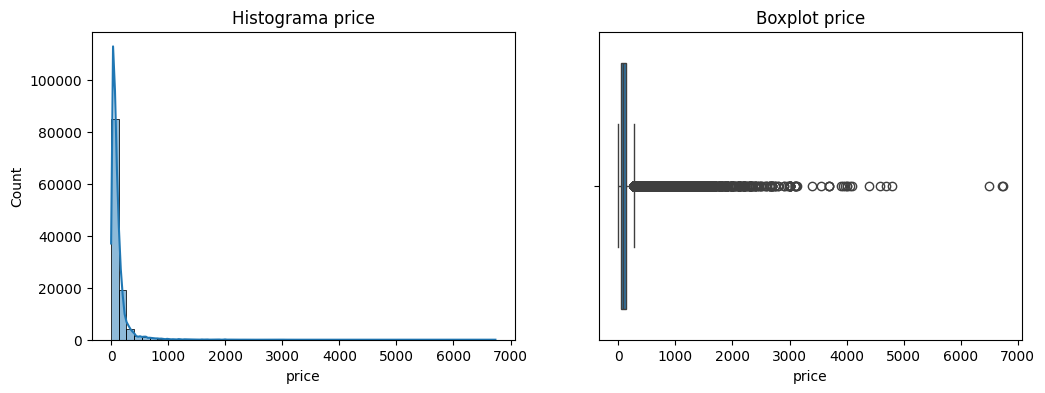

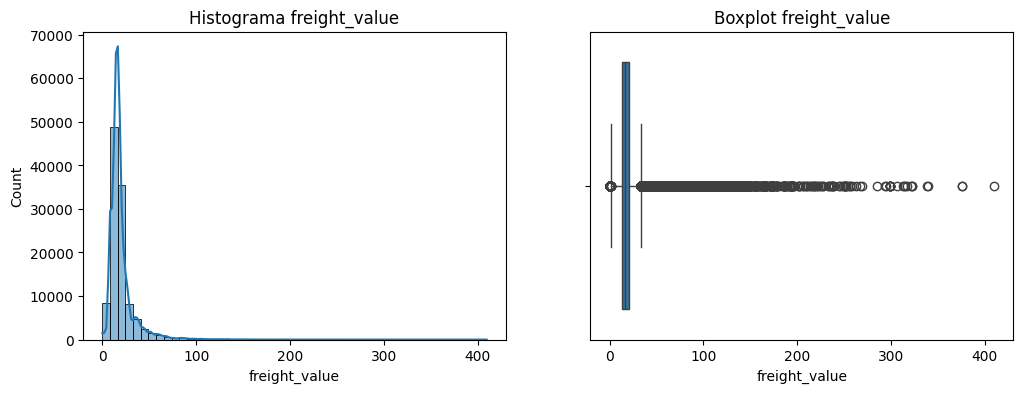

In [27]:
# Visualizações e gráficos explicativos

#Histogramas & boxplots para price/freight
for c in ['price','freight_value']:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[c].dropna(), bins=50, kde=True)
    plt.title(f'Histograma {c}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[c].dropna())
    plt.title(f'Boxplot {c}')
    plt.show()


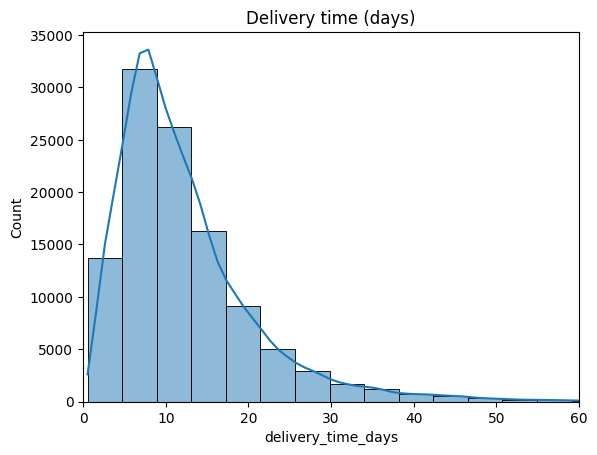

In [28]:
#Delivery time distribution (dias)
sns.histplot(df['delivery_time_days'].dropna(), bins=50, kde=True)
plt.title('Delivery time (days)')
plt.xlim(0,60)  # focaliza nos primeiros 60 dias
plt.show()


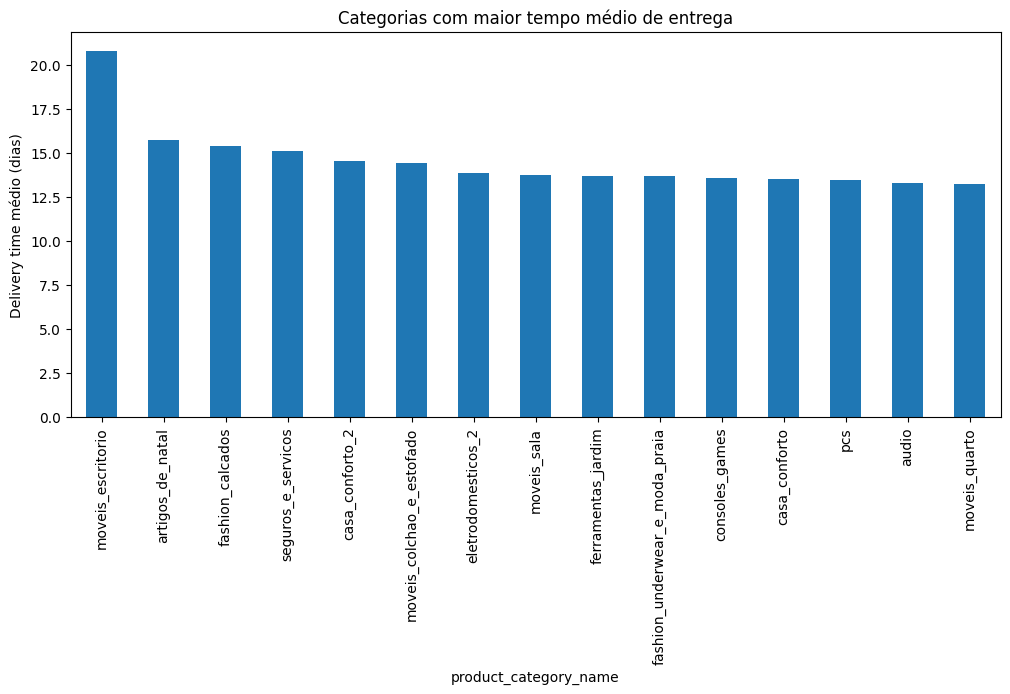

In [29]:
#Top categorias com maior atraso médio

cat_delay = df.groupby('product_category_name')['delivery_time_days'].mean().dropna().sort_values(ascending=False).head(15)
cat_delay.plot(kind='bar', figsize=(12,5))
plt.ylabel('Delivery time médio (dias)')
plt.title('Categorias com maior tempo médio de entrega')
plt.show()


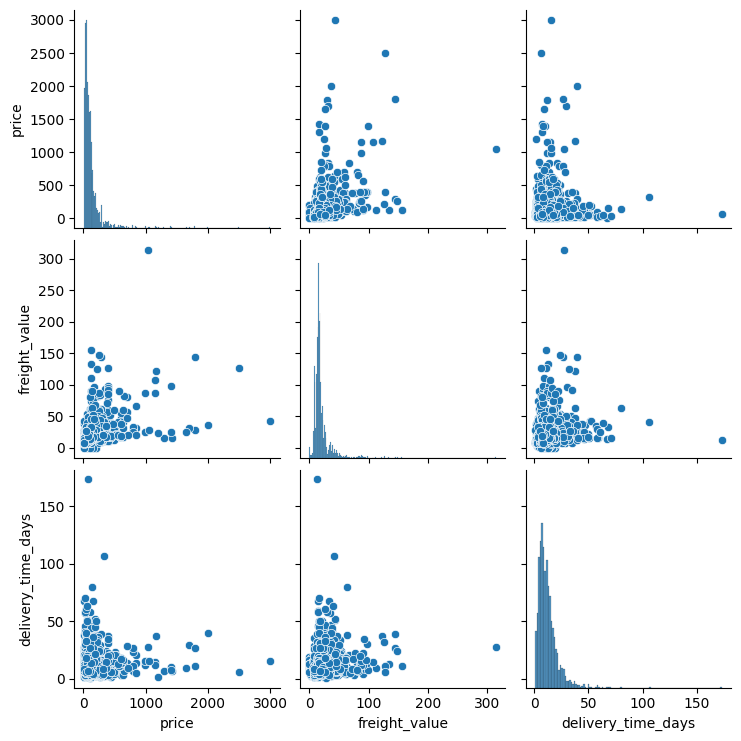

In [30]:
#Correlação entre price, freight, delivery_time

sns.pairplot(df[['price','freight_value','delivery_time_days']].dropna().sample(2000))
plt.show()
